<a href="https://colab.research.google.com/github/wenjie-hoo/nn_uwr_22/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

**Submission deadlines:** 
- get at least 4 points by Tuesday, 30.03.2023
- remaining points: last lab session before or on Tuesday, 06.04.2023

**Points:** Aim to get 16 out of 20+ possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab (preferred since one can get free GPUs there)).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/rnoxy/dl_uwr.

# Problems


## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

## Problem 2: Stochastic Gradient Descent [3p]

We provide below starter code that trains a softmax regression model. Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [4p]

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Dropout [2p]

Learn about dropout:

- implement a **dropout** layer 
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 6: Data Augmentation [1p]

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, make sure they are re-computed in every epoch. Consider applying augmentation either in the training loop or in the `InMemDataLoader`. For the second case, function `InMemDataLoader.__iter__` is a good place to do it.

## Problem 7: Batch Normalization [1p]

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p]

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Polyak Averaging [1p]

Implement Polyak averaging. For each parameter $\theta$
keep a separate, exponentially decayed average of the past values
$$
\bar{\theta}_n = \alpha_p\bar{\theta}_{n-1} + (1-\alpha_p)\theta_n.
$$
Use that average when evaluating the model on the test set.
Validate the approach by training a model on the MNIST dataset.

## Problem 10: Hyperparameter tuner [1p]

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 11: Pruning [1p]

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to 
1. train the network, 
2. set to zero the smallest weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 12: Extreme Learning Machine (ELM) [2p]

Consider a neural network with 1 hidden layer. In the extreme learning approach, the first layer is not trained, but instead, it is randomly set. It is often very large. The second (output) layer weights can then be set using the closed-form formula for linear regression. Thus, training an ELM is fast (there is no iterative optimization) and one can try many different hyperparameters, such as hidden layer size, the random distribution from which weights are sampled, the hidden activation function, and so forth.

Task: Implement an ELM for MNIST and try to reach the performance of your backpropagation-trained model.

## Problem 13: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [1]:
%matplotlib inline

In [2]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import torch.optim as optim

import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

In [3]:
!pip install -q gdown httpimport
!gdown 'https://github.com/wenjie-hoo/nn_uwr_22/raw/main/MNIST.tar.gz'

Downloading...
From: https://github.com/wenjie-hoo/nn_uwr_22/raw/main/MNIST.tar.gz
To: /content/MNIST.tar.gz
100% 34.8M/34.8M [00:00<00:00, 320MB/s]


### problem 1

In [4]:
def matmul_loop(a, b):
    m, n = a.shape
    n, p = b.shape
    c = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                c[i,j] += a[i,k] * b[k,j]
    return c

def matmul_einsum(a, b):
    return np.einsum('ik,kj->ij', a, b)

def matmul_np(a, b):
    return np.matmul(a, b)

def matmul_torch_cpu(a, b):
    a_t = torch.from_numpy(a)
    b_t = torch.from_numpy(b)
    return torch.matmul(a_t, b_t).numpy()

def matmul_torch_gpu(a, b):
    a_t = torch.from_numpy(a).cuda()
    b_t = torch.from_numpy(b).cuda()
    return torch.matmul(a_t, b_t).cpu().numpy()
if torch.cuda.is_available():
  shapes = [(100, 100), (500, 500)]
  for shape in shapes:
      a = np.random.rand(*shape)
      b = np.random.rand(*shape)

      t0 = time.time()
      matmul_loop(a, b)
      t1 = time.time()
      matmul_einsum(a, b)
      t2 = time.time()
      matmul_np(a, b)
      t3 = time.time()
      matmul_torch_cpu(a, b)
      t4 = time.time()
      matmul_torch_gpu(a, b)
      t5 = time.time()

      print(f"Shape: {shape}")
      print(f"Loop: {t1-t0:.5f}s")
      print(f"Einsum: {t2-t1:.5f}s")
      print(f"np.matmul: {t3-t2:.5f}s")
      print(f"torch.matmul on CPU: {t4-t3:.5f}s")
      print(f"torch.matmul on GPU: {t5-t4:.5f}s")
    

Shape: (100, 100)
Loop: 0.53909s
Einsum: 0.00047s
np.matmul: 0.00348s
torch.matmul on CPU: 0.06055s
torch.matmul on GPU: 8.03817s
Shape: (500, 500)
Loop: 79.88447s
Einsum: 0.04661s
np.matmul: 0.00748s
torch.matmul on CPU: 0.00986s
torch.matmul on GPU: 0.00846s


In [5]:
if torch.cuda.is_available():
  A = torch.randn(10000, 10000)
  B = torch.randn(10000, 10000)
  device =torch.device('cuda')
  A_gpu = A.to(device)
  B_gpu = B.to(device)

  AB_gpu = torch.matmul(A_gpu, B_gpu)
  ATB_gpu = torch.matmul(A_gpu.T, B_gpu)
  ABT_gpu = torch.matmul(A_gpu, B_gpu.T)
  ATBT_gpu = torch.matmul(A_gpu.T, B_gpu.T)

  t1 = time.time()
  torch.matmul(A_gpu, B_gpu)
  t2 = time.time()
  torch.matmul(A_gpu.T, B_gpu)
  t3 = time.time()
  torch.matmul(A_gpu, B_gpu.T)
  t4 = time.time()
  torch.matmul(A_gpu.T, B_gpu.T)
  t5 = time.time()

  print(f"AB on GPU: {t2-t1:.5f}s")
  print(f"ATB on GPU: {t3-t2:.5f}s")
  print(f"ABT on GPU: {t4-t3:.5f}s")
  print(f"ATBT on GPU: {t5-t4:.5f}s")


AB on GPU: 0.00049s
ATB on GPU: 0.00003s
ABT on GPU: 0.00003s
ATBT on GPU: 0.00003s


## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [23]:
class InMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
        transform = None
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.transform = transform
        if transform is not None:
            transform=transforms.Compose([
              transforms.RandomHorizontalFlip(),        
              transforms.RandomVerticalFlip(),         
              transforms.RandomRotation(15),           
              transforms.RandomRotation([90, 180]),     
              transforms.Resize([32, 32]),             
              transforms.RandomCrop([28, 28]),       
              transforms.ToTensor(),
              transforms.Normalize((0.1307,), (0.3081,))
                    ])
        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    def __iter__(self):
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

In [7]:
# Monkey-patch MNIST to use a more robust MIST mirror
torchvision.datasets.MNIST.resources = [
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
        "f68b3c2dcbeaaa9fbdd348bbdeb94873",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
        "d53e105ee54ea40749a09fcbcd1e9432",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
        "9fb629c4189551a2d022fa330f9573f3",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
        "ec29112dd5afa0611ce80d1b7f02629c",
    ),
]

In [8]:
# # Load the data

# batch_size = 128
# data_path = "./data"

# transform = torchvision.transforms.Compose(
#     [
#         torchvision.transforms.ToTensor(),
#         torchvision.transforms.Normalize((0.1307,), (0.3081,)),
#     ]
# )

# _test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# # Load training data, split into train and valid sets
# _train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
# _train.data = _train.data[:50000]
# _train.targets = _train.targets[:50000]


# _valid = datasets.MNIST(root='./data', train=True, download=True, transform=None)
# _valid.data = _valid.data[50000:]
# _valid.targets = _valid.targets[50000:]

# mnist_loaders = {
#     "train": DataLoader(_train, batch_size=batch_size, shuffle=True),
#     "valid": DataLoader(_valid, batch_size=batch_size, shuffle=False),
#     "test": DataLoader(_test, batch_size=batch_size, shuffle=False),
# }

In [9]:
# load dataset locally
! mkdir ./data
! tar -zxvf ./MNIST.tar.gz -C ./data/
! ls ./data/

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt
MNIST


In [10]:
from torchvision.datasets import MNIST
dataset = torchvision.datasets.MNIST('./data')

train_dataset = MNIST(root='./data/', train=True, download=False, transform=ToTensor())
train_loader = InMemDataLoader(train_dataset,batch_size=64, shuffle=True)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = MNIST(root='./data/', train=False, download=False, transform=ToTensor())
test_loader = InMemDataLoader(test_dataset,batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

  0%|          | 0/60000 [00:00<?, ?it/s]

<ipython-input-6-99d76216e041>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
# from torchvision.datasets import MNIST
# dataset = MNIST(root = 'data/', download = True)

# train_dataset = MNIST(root="./data", train=True, download=True, transform=ToTensor())
# train_loader = InMemDataLoader(train_dataset,batch_size=64, shuffle=True)
# # train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_dataset = MNIST(root="./data", train=False, download=True, transform=ToTensor())
# test_loader = InMemDataLoader(test_dataset,batch_size=64, shuffle=True)
# # test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## SGD implementation

We provide below a scaffolding for SGD. You will need to fill the TODOs while solving the assignments.

### problem 2

In [12]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

In [13]:
from matplotlib import parse_version
def SGD(model, num_epochs: int
):
  optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
  # optimizer = torch.optim.Adam(model.parameters( ),lr=0.1, weight_decay=0.001)
  history = {"train_losses": [], "train_errs": [], "val_errs": []}
  loss_count = []
  for epoch in range(num_epochs):
      model.train()
      for i, (x, y_true) in enumerate(train_loader):
          # if torch.cuda.is_available():
          x = x.to(device)
          y_true = y_true.to(device)
          optimizer.zero_grad()
          y_pred = model(x)
          y_pred = y_pred.to(device)
          loss = model.loss(y_pred, y_true)
          loss_count.append(loss.item())
          loss.backward()
          optimizer.step()
          _, y_pred_labels = torch.max(y_pred.data, 1)
          batch_err_rate = 1.0 - torch.mean((y_pred_labels == y_true).float())
          history["train_losses"].append(loss.item())
          history["train_errs"].append(batch_err_rate.item())
          if (i + 1) % 200 == 0:
              print(
                  f"Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item():.4f}, Error Rate: {batch_err_rate.item()*100:.2f}%"
              )
      model.eval()
      val_err_rate = 0.0
      with torch.no_grad():
          for x, y_true in test_loader:
              y_pred = model(x)
              y_true = y_true.to(device)
              _, y_pred_labels = torch.max(y_pred.data, 1)
              y_pred_labels = y_pred_labels.to(device)
              batch_err_rate = 1.0 - torch.mean((y_pred_labels == y_true).float())
              val_err_rate += batch_err_rate.item() * x.size(0)
      val_err_rate /= len(test_loader.dataset)
      history["val_errs"].append((epoch+1, val_err_rate))
      print(f"Validation error rate: {val_err_rate*100:.2f}%")
  plt.figure('PyTorch_CNN_Loss')
  plt.plot(loss_count, label='Loss')
  plt.legend('Loss') 
  plt.show()


Epoch 1, Batch 200, Loss: 0.4121, Error Rate: 6.25%
Epoch 1, Batch 400, Loss: 0.4284, Error Rate: 12.50%
Epoch 1, Batch 600, Loss: 0.2447, Error Rate: 7.81%
Epoch 1, Batch 800, Loss: 0.2850, Error Rate: 7.81%
Validation error rate: 7.39%
Epoch 2, Batch 200, Loss: 0.3058, Error Rate: 6.25%
Epoch 2, Batch 400, Loss: 0.1735, Error Rate: 4.69%
Epoch 2, Batch 600, Loss: 0.1414, Error Rate: 4.69%
Epoch 2, Batch 800, Loss: 0.3025, Error Rate: 4.69%
Validation error rate: 4.64%
Epoch 3, Batch 200, Loss: 0.2567, Error Rate: 6.25%
Epoch 3, Batch 400, Loss: 0.1966, Error Rate: 7.81%
Epoch 3, Batch 600, Loss: 0.0800, Error Rate: 3.12%
Epoch 3, Batch 800, Loss: 0.3917, Error Rate: 4.69%
Validation error rate: 4.62%
Epoch 4, Batch 200, Loss: 0.2817, Error Rate: 4.69%
Epoch 4, Batch 400, Loss: 0.1847, Error Rate: 4.69%
Epoch 4, Batch 600, Loss: 0.0533, Error Rate: 1.56%
Epoch 4, Batch 800, Loss: 0.1885, Error Rate: 6.25%
Validation error rate: 3.99%
Epoch 5, Batch 200, Loss: 0.0984, Error Rate: 3.12%

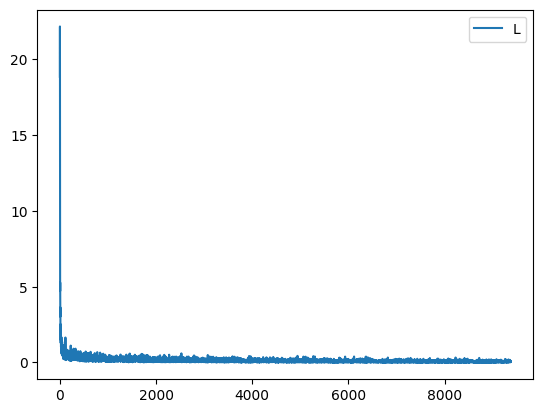

training took 15s.


In [14]:
class Model_p2(nn.Module):
    def __init__(self):
        super(Model_p2, self).__init__()
        self.fc1 = torch.nn.Linear(784, 100)
        self.fc2 = torch.nn.Linear(100, 10)
    def forward(self, X):
        X = X.view(-1, 784)
        X = X.to(device)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return X
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_p2().to(device)
# model.to(device)
with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model,num_epochs = 10)
print(f"training took {time.time() - t_start:.0f}s.")


Epoch 1, Batch 200, Loss: 0.3970, Error Rate: 9.38%
Epoch 1, Batch 400, Loss: 0.2998, Error Rate: 7.81%
Epoch 1, Batch 600, Loss: 0.0816, Error Rate: 1.56%
Epoch 1, Batch 800, Loss: 0.1148, Error Rate: 3.12%
Validation error rate: 3.23%
Epoch 2, Batch 200, Loss: 0.0328, Error Rate: 0.00%
Epoch 2, Batch 400, Loss: 0.0800, Error Rate: 4.69%
Epoch 2, Batch 600, Loss: 0.0256, Error Rate: 0.00%
Epoch 2, Batch 800, Loss: 0.0418, Error Rate: 1.56%
Validation error rate: 3.03%
Epoch 3, Batch 200, Loss: 0.0728, Error Rate: 3.12%
Epoch 3, Batch 400, Loss: 0.1006, Error Rate: 1.56%
Epoch 3, Batch 600, Loss: 0.1196, Error Rate: 6.25%
Epoch 3, Batch 800, Loss: 0.0876, Error Rate: 3.12%
Validation error rate: 2.29%
Epoch 4, Batch 200, Loss: 0.0584, Error Rate: 1.56%
Epoch 4, Batch 400, Loss: 0.0150, Error Rate: 0.00%
Epoch 4, Batch 600, Loss: 0.0430, Error Rate: 1.56%
Epoch 4, Batch 800, Loss: 0.0586, Error Rate: 1.56%
Validation error rate: 2.05%
Epoch 5, Batch 200, Loss: 0.0164, Error Rate: 0.00%


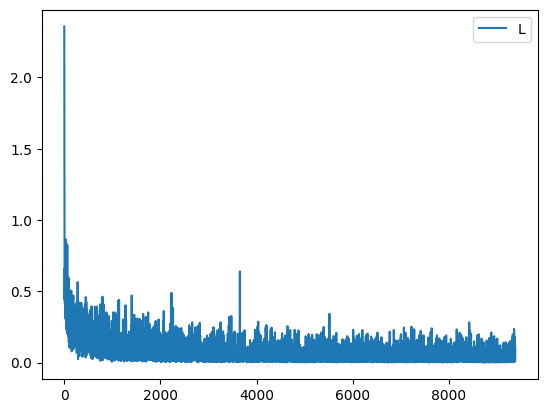

training took 27s.


In [15]:
class Model_p3(nn.Module):
    def __init__(self):
        super(Model_p3, self).__init__()
        self.hidden1 = nn.Sequential(nn.Linear(28*28, 200), nn.BatchNorm1d(200), nn.ReLU(True))
        self.hidden2 = nn.Sequential(nn.Linear(200, 200), nn.BatchNorm1d(200), nn.ReLU(True))
        self.hidden3 = nn.Sequential(nn.Linear(200, 200), nn.BatchNorm1d(200), nn.ReLU(True))
        self.predict = nn.Linear(200, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = x.to(device)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.predict(x)
        return x
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net_mnist = Model_p3()
net_mnist.to(device)


t_start = time.time()
SGD(net_mnist,num_epochs =10)
print(f"training took {time.time() - t_start:.0f}s.")


### problem 4 cnn

In [16]:
class CNNnet(torch.nn.Module):
    def __init__(self):
        super(CNNnet,self).__init__()
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=1,
                            out_channels=16,
                            kernel_size=3,
                            stride=2,
                            padding=1), torch.nn.ReLU())
        self.conv2 = torch.nn.Sequential(torch.nn.Conv2d(16,32,3,2,1),torch.nn.ReLU())
        self.conv3 = torch.nn.Sequential(torch.nn.Conv2d(32,64,3,2,1),torch.nn.ReLU())
        self.conv4 = torch.nn.Sequential(torch.nn.Conv2d(64,64,2,2,0),torch.nn.ReLU())
        self.mlp1 = torch.nn.Linear(2*2*64,100)
        self.mlp2 = torch.nn.Linear(100,10)
    def forward(self,x):
        x = x.to(device)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.mlp1(x.view(x.size(0),-1))
        x = self.mlp2(x)
        return x
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [17]:
def cnn_train(model, num_epochs:int, train_loader, test_loader) :
    model = CNNnet()
    model.to(device)
    # opt = torch.optim.Adam(model.parameters( ),lr=0.001)
    # opt = torch.optim.SGD(model.parameters( ), lr=0.001, momentum=0.8)
    opt = torch.optim.RMSprop(model.parameters( ), lr=0.001, alpha=0.9)
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    loss_count = [] 
    loss_func = torch.nn.CrossEntropyLoss( )
    for epoch in range(num_epochs):
        for i, (x, y_true) in enumerate(train_loader):
            x = x.to(device) 
            y_true = y_true.to(device) 
            out = model(x) 
            y_pred = model(x)
            y_pred = y_pred.to(device)
            loss = loss_func(out, y_true)
            opt.zero_grad()  
            loss.backward() 
            opt.step()   
            _, y_pred_labels = torch.max(y_pred.data, 1)
            batch_err_rate = 1.0 - torch.mean((y_pred_labels == y_true).float())
            history["train_losses"].append(loss.item())
            history["train_errs"].append(batch_err_rate.item())
            if (i + 1) % 200 == 0:
              print(
                  f"Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item():.4f}, Error Rate: {batch_err_rate.item()*100:.2f}%"
              )
        model.eval()
        val_err_rate = 0.0
        with torch.no_grad():
            for x, y_true in test_loader:
                y_pred = model(x)
                y_true = y_true.to(device)
                _, y_pred_labels = torch.max(y_pred.data, 1)
                y_pred_labels = y_pred_labels.to(device)
                batch_err_rate = 1.0 - torch.mean((y_pred_labels == y_true).float())
                val_err_rate += batch_err_rate.item() * x.size(0)
        val_err_rate /= len(test_loader.dataset)
        history["val_errs"].append((epoch+1, val_err_rate))
        print(f"Validation error rate: {val_err_rate*100:.2f}%")

In [18]:
CNNmodel = CNNnet()
CNNmodel = CNNmodel.to(device)
t_start = time.time()
cnn_train(CNNmodel, 10, train_loader, test_loader)
print(f"training took {time.time() - t_start:.0f}s.")


Epoch 1, Batch 200, Loss: 0.2946, Error Rate: 9.38%
Epoch 1, Batch 400, Loss: 0.0723, Error Rate: 1.56%
Epoch 1, Batch 600, Loss: 0.2510, Error Rate: 10.94%
Epoch 1, Batch 800, Loss: 0.0958, Error Rate: 3.12%
Validation error rate: 5.65%
Epoch 2, Batch 200, Loss: 0.0239, Error Rate: 0.00%
Epoch 2, Batch 400, Loss: 0.0924, Error Rate: 3.12%
Epoch 2, Batch 600, Loss: 0.0445, Error Rate: 1.56%
Epoch 2, Batch 800, Loss: 0.0057, Error Rate: 0.00%
Validation error rate: 2.28%
Epoch 3, Batch 200, Loss: 0.0408, Error Rate: 1.56%
Epoch 3, Batch 400, Loss: 0.0440, Error Rate: 1.56%
Epoch 3, Batch 600, Loss: 0.0625, Error Rate: 1.56%
Epoch 3, Batch 800, Loss: 0.0152, Error Rate: 0.00%
Validation error rate: 1.84%
Epoch 4, Batch 200, Loss: 0.0214, Error Rate: 1.56%
Epoch 4, Batch 400, Loss: 0.0162, Error Rate: 1.56%
Epoch 4, Batch 600, Loss: 0.0051, Error Rate: 0.00%
Epoch 4, Batch 800, Loss: 0.0934, Error Rate: 1.56%
Validation error rate: 2.10%
Epoch 5, Batch 200, Loss: 0.0076, Error Rate: 0.00%

# Problem 5 dropout

In [19]:
class cnnNet2(torch.nn.Module):
    def __init__(self):
        super(cnnNet2, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        self.dropout1 = torch.nn.Dropout(0.25)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(9216, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = x.to(device)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x


In [20]:
CNNmodel2 = cnnNet2()
CNNmodel2 = CNNmodel2.to(device)
t_start = time.time()
cnn_train(CNNmodel2,10,train_loader,test_loader)
print(f"training took {time.time() - t_start:.0f}s.")


Epoch 1, Batch 200, Loss: 0.1643, Error Rate: 4.69%
Epoch 1, Batch 400, Loss: 0.2022, Error Rate: 7.81%
Epoch 1, Batch 600, Loss: 0.3758, Error Rate: 12.50%
Epoch 1, Batch 800, Loss: 0.0793, Error Rate: 3.12%
Validation error rate: 3.76%
Epoch 2, Batch 200, Loss: 0.2348, Error Rate: 6.25%
Epoch 2, Batch 400, Loss: 0.1028, Error Rate: 3.12%
Epoch 2, Batch 600, Loss: 0.0847, Error Rate: 1.56%
Epoch 2, Batch 800, Loss: 0.0787, Error Rate: 3.12%
Validation error rate: 2.12%
Epoch 3, Batch 200, Loss: 0.0830, Error Rate: 3.12%
Epoch 3, Batch 400, Loss: 0.0187, Error Rate: 0.00%
Epoch 3, Batch 600, Loss: 0.0042, Error Rate: 0.00%
Epoch 3, Batch 800, Loss: 0.0134, Error Rate: 0.00%
Validation error rate: 1.91%
Epoch 4, Batch 200, Loss: 0.0410, Error Rate: 1.56%
Epoch 4, Batch 400, Loss: 0.0412, Error Rate: 1.56%
Epoch 4, Batch 600, Loss: 0.0575, Error Rate: 3.12%
Epoch 4, Batch 800, Loss: 0.0148, Error Rate: 0.00%
Validation error rate: 1.41%
Epoch 5, Batch 200, Loss: 0.0276, Error Rate: 1.56%

# problem 6

In [21]:
# add transforms.Compose
dataset = torchvision.datasets.MNIST('./data')
train_dataset = MNIST(root='./data/', train=True, download=False,  transform=ToTensor())
train_loader = InMemDataLoader(train_dataset,batch_size=64, shuffle=True, transform = True)
test_dataset = MNIST(root='./data/', train=False, download=False, transform=ToTensor())
test_loader = InMemDataLoader(test_dataset,batch_size=64, shuffle=True, transform = True)


  0%|          | 0/60000 [00:00<?, ?it/s]

<ipython-input-6-99d76216e041>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

In [24]:
CNNmodel2 = cnnNet2()
CNNmodel2 = CNNmodel2.to(device)
t_start = time.time()
cnn_train(CNNmodel2,10,train_loader,test_loader)
print(f"training took {time.time() - t_start:.0f}s.")

Epoch 1, Batch 200, Loss: 0.4089, Error Rate: 15.62%
Epoch 1, Batch 400, Loss: 0.0670, Error Rate: 0.00%
Epoch 1, Batch 600, Loss: 0.0561, Error Rate: 3.12%
Epoch 1, Batch 800, Loss: 0.0548, Error Rate: 1.56%
Validation error rate: 2.97%
Epoch 2, Batch 200, Loss: 0.0480, Error Rate: 1.56%
Epoch 2, Batch 400, Loss: 0.1364, Error Rate: 4.69%
Epoch 2, Batch 600, Loss: 0.0167, Error Rate: 0.00%
Epoch 2, Batch 800, Loss: 0.0127, Error Rate: 0.00%
Validation error rate: 2.49%
Epoch 3, Batch 200, Loss: 0.0229, Error Rate: 0.00%
Epoch 3, Batch 400, Loss: 0.1132, Error Rate: 3.12%
Epoch 3, Batch 600, Loss: 0.1376, Error Rate: 4.69%
Epoch 3, Batch 800, Loss: 0.0285, Error Rate: 1.56%
Validation error rate: 1.51%
Epoch 4, Batch 200, Loss: 0.0546, Error Rate: 3.12%
Epoch 4, Batch 400, Loss: 0.0037, Error Rate: 0.00%
Epoch 4, Batch 600, Loss: 0.1999, Error Rate: 4.69%
Epoch 4, Batch 800, Loss: 0.0071, Error Rate: 0.00%
Validation error rate: 1.61%
Epoch 5, Batch 200, Loss: 0.0090, Error Rate: 0.00%

# problem 7

In [35]:
class BatchNorm2d(torch.nn.Module):
    def __init__(self, channel, eps=1e-5, affine=True, momentum=0.9):
        super().__init__()
        self.gamma = torch.nn.Parameter(torch.ones(1, channel, 1, 1))
        self.beta = torch.nn.Parameter(torch.zeros(1, channel, 1, 1))
        self.eps = eps
        self.affine = affine
        self.momentum = momentum
        self.register_buffer('running_mean', torch.zeros(channel))
        self.register_buffer('running_var', torch.ones(channel))

    def forward(self, input):
        # input shape must be (n, c, h, w)
        if self.training:
            means = input.mean((0, 2, 3), keepdim=True)
            vars = ((input-means)**2).sum((0, 2, 3), keepdim=True)
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * means
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * vars
        else:
            means = self.running_mean
            vars = self.running_var

        output = (input - means) / torch.sqrt(vars + self.eps)
        if self.affine:
            output =  output* self.gamma + self.beta
        return output

In [36]:
class cnnNet_BN(torch.nn.Module):
    def __init__(self, bn=False):
        super().__init__()

        if bn:
            self.conv = torch.nn.Sequential(
                torch.nn.Conv2d(1, 20, kernel_size=5),
                torch.nn.MaxPool2d(2),
                torch.nn.BatchNorm2d(20),
                torch.nn.ReLU(),
                torch.nn.Conv2d(20, 50, kernel_size=5),
                torch.nn.MaxPool2d(2),
                torch.nn.BatchNorm2d(50),
                torch.nn.ReLU())

            self.dense = torch.nn.Sequential(
                torch.nn.Linear(800, 500),
                torch.nn.BatchNorm1d(500),
                torch.nn.ReLU(),
                torch.nn.Linear(500, 10)
            )
        else:
            self.conv = torch.nn.Sequential(
                torch.nn.Conv2d(1, 20, kernel_size=5),
                torch.nn.MaxPool2d(2),
                torch.nn.ReLU(),
                torch.nn.Conv2d(20, 50, kernel_size=5),
                torch.nn.MaxPool2d(2),
                torch.nn.ReLU())
            self.dense = torch.nn.Sequential(
                torch.nn.Linear(800, 500),
                torch.nn.ReLU(),
                torch.nn.Linear(500, 10))

    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x, start_dim=1)
        x = self.dense(x)
        return x

In [37]:
CNNmodel_bn = cnnNet_BN()
CNNmodel_bn = CNNmodel_bn.to(device)
t_start = time.time()
cnn_train(CNNmodel_bn,10,train_loader,test_loader)
print(f"training took {time.time() - t_start:.0f}s.")

Epoch 1, Batch 200, Loss: 0.2484, Error Rate: 4.69%
Epoch 1, Batch 400, Loss: 0.1975, Error Rate: 6.25%
Epoch 1, Batch 600, Loss: 0.1538, Error Rate: 6.25%
Epoch 1, Batch 800, Loss: 0.1643, Error Rate: 6.25%
Validation error rate: 4.33%
Epoch 2, Batch 200, Loss: 0.0627, Error Rate: 1.56%
Epoch 2, Batch 400, Loss: 0.0340, Error Rate: 1.56%
Epoch 2, Batch 600, Loss: 0.1171, Error Rate: 4.69%
Epoch 2, Batch 800, Loss: 0.1247, Error Rate: 4.69%
Validation error rate: 2.32%
Epoch 3, Batch 200, Loss: 0.0448, Error Rate: 1.56%
Epoch 3, Batch 400, Loss: 0.0123, Error Rate: 0.00%
Epoch 3, Batch 600, Loss: 0.0301, Error Rate: 1.56%
Epoch 3, Batch 800, Loss: 0.0786, Error Rate: 3.12%
Validation error rate: 1.79%
Epoch 4, Batch 200, Loss: 0.0106, Error Rate: 0.00%
Epoch 4, Batch 400, Loss: 0.0204, Error Rate: 1.56%
Epoch 4, Batch 600, Loss: 0.0436, Error Rate: 3.12%
Epoch 4, Batch 800, Loss: 0.1252, Error Rate: 3.12%
Validation error rate: 1.68%
Epoch 5, Batch 200, Loss: 0.0125, Error Rate: 0.00%
